In [3]:
import numpy as np
import pandas as pd
from scipy import optimize

import matplotlib.pyplot as plt

import multipletau

In [4]:
%pdb

Automatic pdb calling has been turned ON


In [5]:
def func_(x, T, c):
    return (( ((T-x)/(c*T**2)) * np.heaviside((T-x),0)) )

# Single track analysis

In [10]:
# read one file
path = "/mnt/sda1/Sophie/2-KineticAnalysisData/1-ConfirmData/movie twiCrispr/"
file = "M142Het CJD1 ultrafast 0_20 in nc14 e1_Airyscan Processing/track_spot_table.csv"
f = path+file
datas = pd.read_csv(f)
datas.drop(index=[0,1,2], inplace=True)
datas['FRAME'] = pd.to_numeric(datas["FRAME"])
datas['POSITION_X'] = pd.to_numeric(datas["POSITION_X"])
datas['POSITION_Y'] = pd.to_numeric(datas["POSITION_Y"])
datas['TRACK_ID'] = pd.to_numeric(datas["TRACK_ID"])
datas['MEAN_INTENSITY_CH1'] = pd.to_numeric(datas["MEAN_INTENSITY_CH1"])
datas['POSITION_T'] = pd.to_numeric(datas["POSITION_T"])

In [13]:
print(np.unique(datas.TRACK_ID))
datas.head()

[0.000e+00 1.000e+00 2.000e+00 ... 1.095e+03 1.096e+03       nan]


,LABEL,ID,TRACK_ID,QUALITY,POSITION_X,POSITION_Y,POSITION_Z,POSITION_T,FRAME,RADIUS,VISIBILITY,MANUAL_SPOT_COLOR,MEAN_INTENSITY_CH1,MEDIAN_INTENSITY_CH1,MIN_INTENSITY_CH1,MAX_INTENSITY_CH1,TOTAL_INTENSITY_CH1,STD_INTENSITY_CH1,CONTRAST_CH1,SNR_CH1
3,ID23425,23425,NaN,197.5994873046875,12.915246,16.789820,1.0,0.0,0,0.27675527365461305,1,NaN,562.935484,427.0,47.0,2571.0,17451.0,499.15888822991496,0.2299323097741544,0.4216660185301108
4,ID23427,23427,NaN,206.67523193359375,16.605316,5.535105,1.5,0.0,0,0.27675527365461305,1,NaN,531.935484,348.0,30.0,2387.0,16490.0,566.1183583835847,0.2696118626161835,0.39907060919512627
5,ID23428,23428,NaN,130.49612426757812,16.605316,7.933651,1.5,0.0,0,0.27675527365461305,1,NaN,379.354839,275.0,0.0,1767.0,11760.0,359.08769109017527,0.21067458487848034,0.3676713809940958
6,ID23430,23430,NaN,125.51947021484375,0.000000,21.402408,1.5,0.0,0,0.27675527365461305,1,NaN,590.516129,484.0,143.0,1867.0,18306.0,424.6786919517501,0.2989361540371915,0.6400176144200168
7,ID23433,23433,NaN,126.26629638671875,16.236309,2.583049,2.0,0.0,0,0.27675527365461305,1,NaN,401.838710,312.0,56.0,1509.0,12457.0,346.2890985649797,0.2555018825545149,0.4723018889981459


1.0


/home/u2175049/anaconda3/lib/python3.9/site-packages/multipletau/core.py:198: RuntimeWarning: divide by zero encountered in long_scalars
  k = np.int_(np.floor(np.log2(N / m)))


TypeError: Improper input: func input vector length N=2 must not exceed func output vector length M=1

> /home/u2175049/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py(414)leastsq()
    412 
    413     if n > m:
--> 414         raise TypeError(f"Improper input: func input vector length N={n} must"
    415                         f" not exceed func output vector length M={m}")
    416 

ipdb> c


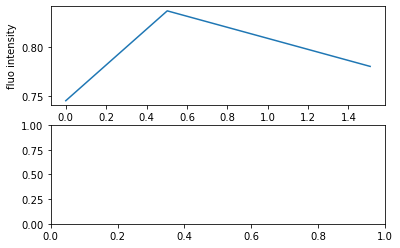

In [14]:
# Analyse one track
# Choose your track id
id_= np.unique(datas.TRACK_ID)[1]
# id_ = 0
print(id_)

x = datas[datas.TRACK_ID==id_].sort_values('FRAME')['POSITION_T'].values-min(datas[datas.TRACK_ID==id_].sort_values('FRAME')['POSITION_T'].values)
y = datas[datas.TRACK_ID==id_].sort_values('FRAME')['MEAN_INTENSITY_CH1'].values/2**16*100
fig, ax = plt.subplots(2,1)
ax[0].plot(x,y)
ax[0].set_xlabel("time")
ax[0].set_ylabel("fluo intensity")

mm = int(len(datas[datas.TRACK_ID==id_])/2-1)
if (mm%2)==0: 
    autocor = multipletau.autocorrelate(y,
                                    m=mm,
                                    deltat=0.5, 
                                    normalize=True)
else: 
    autocor = multipletau.autocorrelate(y,
                                    m=mm+1,
                                    deltat=0.5,
                                    normalize=True)



popt, pcov = optimize.curve_fit(func_, 
                            autocor.flatten()[0::2],
                            autocor.flatten()[1::2], 
                            method='lm' )


ax[1].plot(autocor.flatten()[0::2], autocor.flatten()[1::2], '.')
ax[1].plot(autocor.flatten()[0::2], func_(autocor.flatten()[0::2], *popt) )
ax[1].set_xlabel("Time delay \Tau (sec)")
ax[1].set_ylabel("G(\Tau)")

fig.set_size_inches((10,10))

,LABEL,ID,TRACK_ID,QUALITY,POSITION_X,POSITION_Y,POSITION_Z,POSITION_T,FRAME,RADIUS,VISIBILITY,MEAN_INTENSITY_CH1,MEDIAN_INTENSITY_CH1,MIN_INTENSITY_CH1,MAX_INTENSITY_CH1,TOTAL_INTENSITY_CH1,STD_INTENSITY_CH1,CONTRAST_CH1,SNR_CH1
9,ID23438,23438,9.0,205.0240478515625,3.505567,15.867302,2.5,0.00000,0,0.27675527365461305,1,617.741935,387.0,90.0,1922.0,19150.0,512.4209836805369,0.27324587940400125,0.5174298944189427
11,ID23443,23443,0.0,100.99395751953125,20.295387,3.874574,3.0,0.00000,0,0.27675527365461305,1,359.645161,244.0,61.0,1278.0,11149.0,289.16310834165284,0.2091478964672052,0.4302643949820531
12,ID23445,23445,2.0,188.79144287109375,21.955918,19.557373,3.0,0.00000,0,0.27675527365461305,1,526.096774,401.0,78.0,1979.0,16309.0,451.44946965957774,0.2635541285236307,0.48614123509873713
16,ID23453,23453,7.0,158.716064453125,12.546239,22.324925,4.0,0.00000,0,0.27675527365461305,1,445.870968,306.0,71.0,2061.0,13822.0,481.5186906677306,0.24694318233808615,0.3667553151999421
18,ID23461,23461,3.0,257.81597900390625,3.690070,21.033401,4.5,0.00000,0,0.27675527365461305,1,843.580645,659.0,177.0,2026.0,26151.0,645.7258331621117,0.3013393579143538,0.6050255775707964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11646,ID54947,54947,1085.0,141.77838134765625,20.110883,3.874574,4.5,261.80843,521,0.27675527365461305,1,408.354839,297.0,110.0,1717.0,12659.0,351.18072729836194,0.32687860168111527,0.572917817558928
11647,ID54954,54954,1090.0,143.10934448242188,13.468757,17.527834,4.5,261.80843,521,0.27675527365461305,1,479.354839,392.0,21.0,1391.0,14860.0,349.40793240252356,0.33157190001817755,0.6832308174563407
11648,ID54956,54956,1065.0,220.17108154296875,2.029539,19.741876,4.5,261.80843,521,0.27675527365461305,1,736.193548,576.0,58.0,2603.0,22822.0,646.2672522187106,0.2911866091742675,0.5137977982085137
11649,ID54957,54957,1091.0,142.0439453125,2.583049,21.586911,4.5,261.80843,521,0.27675527365461305,1,528.903226,466.0,47.0,1342.0,16396.0,367.98445210259536,0.2308820864036927,0.5392008015203257


In [289]:
966/16, 1300/25

(60.375, 52.0)

# Multiple file analysis

In [285]:
path = "/mnt/sda1/Sophie/2-KineticAnalysisData/1-ConfirmData/movie twiCrispr/"
files = [
#          "M142Het CJD1 ultrafast 0_20 in nc14 e2_Airyscan Processing/track_spot_table.csv",
         "M142Het CJD1 ultrafast 0_10 in nc13 e1_Airyscan Processing/track_spot_table.csv",
#          "M142Het CJD1 ultrafast 0_20 in nc14 e4_Airyscan Processing/track_spot_table.csv",
        ]

# path = "/mnt/sda1/Sophie/2-KineticAnalysisData/1-ConfirmData/movie fast ilp4/"
# files = [
#          "scfvhet ilp4 laser 5percent zoom8 time frame754.2ms__Airyscan Processing_nc14/track_spot_table.csv",
#         ]

In [286]:
columns = ['file_name', 'track_id','len_track', 'elongation_time', 'init_translation_rate']
result = pd.DataFrame(columns=columns, dtype=float)
elongation_time=[]
translation_rate=[]
for f in files:
    f = path+f
    datas = pd.read_csv(f)
    datas.drop(index=[0,1,2], inplace=True)
    datas['FRAME'] = pd.to_numeric(datas["FRAME"])
    datas['POSITION_X'] = pd.to_numeric(datas["POSITION_X"])
    datas['POSITION_Y'] = pd.to_numeric(datas["POSITION_Y"])
    datas['TRACK_ID'] = pd.to_numeric(datas["TRACK_ID"])
    datas['MEAN_INTENSITY_CH1'] = pd.to_numeric(datas["MEAN_INTENSITY_CH1"])
    datas['POSITION_T'] = pd.to_numeric(datas["POSITION_T"])
    datas.drop("MANUAL_SPOT_COLOR", axis=1, inplace=True)
    datas = datas.dropna(axis=0)
    


    for id_ in np.unique(datas['TRACK_ID']):
        
        x = datas[datas.TRACK_ID==id_].sort_values('FRAME')['POSITION_T'].values-min(datas[datas.TRACK_ID==id_].sort_values('FRAME')['POSITION_T'].values)
        y = datas[datas.TRACK_ID==id_].sort_values('FRAME')['MEAN_INTENSITY_CH1'].values
        if len(x)>10:
            mm = int(len(datas[datas.TRACK_ID==id_])/2-1)
            if (mm%2)==0: 
                autocor = multipletau.autocorrelate(y,
                                                m=mm,
                                                deltat=0.5, 
                                                normalize=True)
            else: 
                autocor = multipletau.autocorrelate(y,
                                                m=mm+1,
                                                deltat=0.5,
                                                normalize=True)



            popt, pcov = optimize.curve_fit(func_, 
                                        autocor.flatten()[0::2],
                                        autocor.flatten()[1::2], 
                                        method='lm' )
            if popt[0]>5:
                d = pd.DataFrame.from_dict({'file_name':f.split('/')[-2],
                                            'track_id':id_,
                                            'len_track': len(x),
                                            'elongation_time':popt[0],
                                            'init_translation_rate':popt[1]},
                                           orient='index').T
                result = pd.concat([result, d], ignore_index=True)

# result.drop(result[result["len_track"]<100].index, inplace=True)

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/sda1/Sophie/2-KineticAnalysisData/1-ConfirmData/movie fast ilp4/scfvhet ilp4 laser 5percent zoom8 time frame754.2ms__Airyscan Processing_nc14/track_spot_table.csv'

> /home/u2175049/anaconda3/lib/python3.9/site-packages/pandas/io/common.py(789)get_handle()
    787         if ioargs.encoding and "b" not in ioargs.mode:
    788             # Encoding
--> 789             handle = open(
    790                 handle,
    791                 ioargs.mode,

ipdb> 


In [281]:
result['elongation_time_norm'] = 966/result['elongation_time']
result['init_translation_rate_norm'] = result['init_translation_rate']
result['tmp'] = 1

In [282]:
result

,file_name,track_id,len_track,elongation_time,init_translation_rate,elongation_time_norm,init_translation_rate_norm,tmp
0,scfvhet ilp4 laser 5percent zoom8 time frame75...,2564,182,32.72053,2.336637,45.384351,2.336637,1
1,scfvhet ilp4 laser 5percent zoom8 time frame75...,2712,142,9.296422,4.018933,159.738869,4.018933,1
2,scfvhet ilp4 laser 5percent zoom8 time frame75...,3037,124,7.984046,10.251606,185.995927,10.251606,1


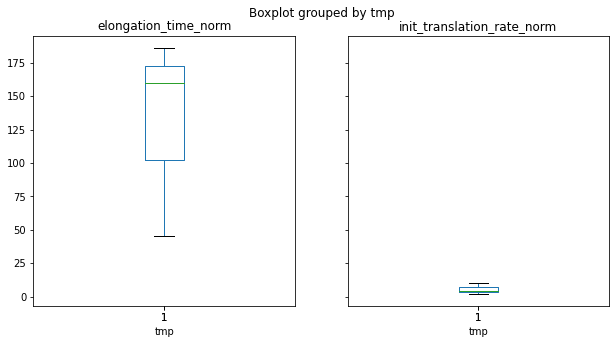

In [283]:
# result['elongation_time'] = pd.to_numeric(result['elongation_time'])
fig, ax = result.boxplot(['elongation_time_norm', 'init_translation_rate_norm'] , 
#                          by='file_name', 
                         by='tmp',
                         grid=False, 
                         figsize=(10,5))


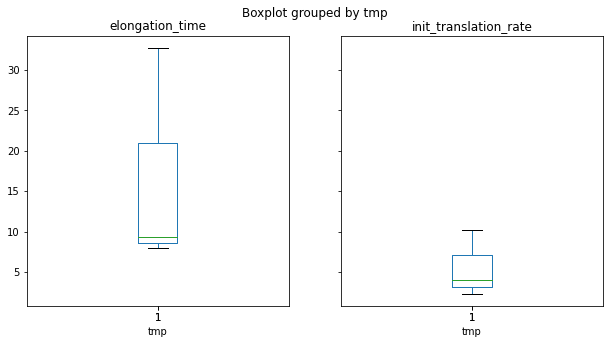

In [284]:
# result['elongation_time'] = pd.to_numeric(result['elongation_time'])
fig, ax = result.boxplot(['elongation_time', 'init_translation_rate'] , 
#                          by='file_name', 
                         by='tmp', 
                         grid=False, 
                         figsize=(10,5))


In [273]:
result.mean()

/tmp/ipykernel_49481/2046019998.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  result.mean()


track_id                      426.111111
len_track                     139.000000
elongation_time                19.817291
init_translation_rate           2.077286
elongation_time_norm          121.633956
init_translation_rate_norm      2.077286
tmp                             1.000000
dtype: float64

# plot all track that was keep in result table

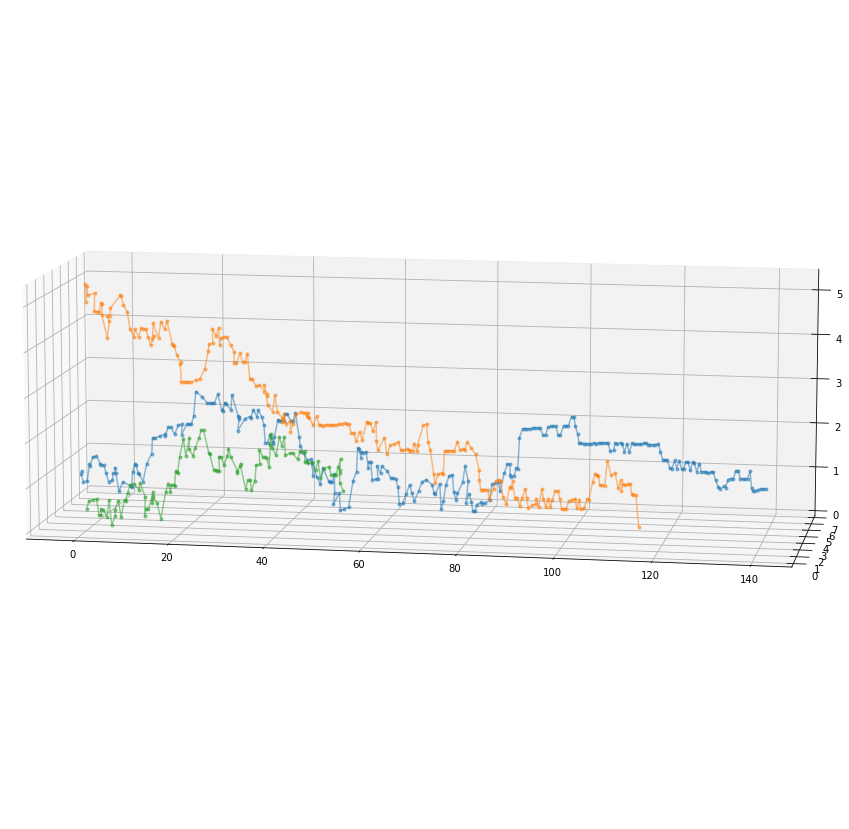

In [258]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure()
ax = plt.axes(projection='3d')

# ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1, 0.5, 0.5, 1]))
ax.set_box_aspect(aspect = (3,1,1))


for id_ in np.unique(result['track_id']):
    x = (datas[datas.TRACK_ID==id_].sort_values('FRAME')['POSITION_T'].to_numpy()
         - np.min(datas[datas.TRACK_ID==id_].sort_values('FRAME')['POSITION_T'].to_numpy()))
    y = (datas[datas.TRACK_ID==id_].sort_values('FRAME')['POSITION_X'].to_numpy()
         - np.min(datas[datas.TRACK_ID==id_].sort_values('FRAME')['POSITION_X'].to_numpy()))
    z = (datas[datas.TRACK_ID==id_].sort_values('FRAME')['POSITION_Y'].to_numpy()
         - np.min(datas[datas.TRACK_ID==id_].sort_values('FRAME')['POSITION_Y'].to_numpy()))
    
    ax.plot(x, 
            y, 
            z, 
            '.-',
            alpha = 0.5
            )


fig.set_size_inches((15, 15))

ax.view_init(elev=10., azim=-80)

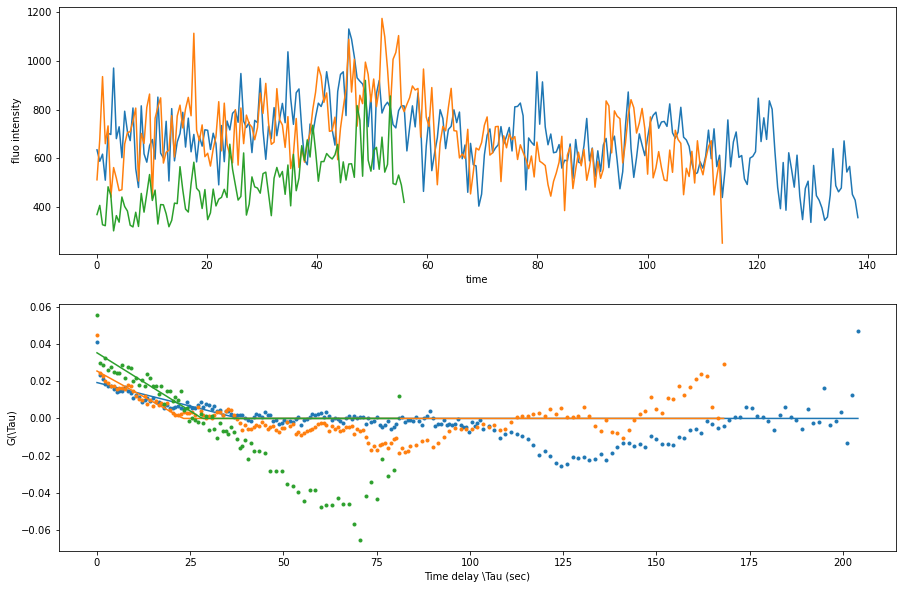

In [260]:
import matplotlib.colors as mcolors
fig, ax = plt.subplots(2,1)

colors = list(mcolors.TABLEAU_COLORS.keys())

i=0
for id_ in np.unique(result['track_id'].to_numpy()):

    x = datas[datas.TRACK_ID==id_].sort_values('FRAME')['POSITION_T'].values-min(datas[datas.TRACK_ID==id_].sort_values('FRAME')['POSITION_T'].values)
    y = datas[datas.TRACK_ID==id_].sort_values('FRAME')['MEAN_INTENSITY_CH1'].values
    
    ax[0].plot(x, y, color=colors[i])


    mm = int(len(datas[datas.TRACK_ID==id_])/2-1)
    if (mm%2)==0: 
        autocor = multipletau.autocorrelate(y,
                                        m=mm,
                                        deltat=0.75, 
                                        normalize=True)
    else: 
        autocor = multipletau.autocorrelate(y,
                                        m=mm+1,
                                        deltat=0.75,
                                        normalize=True)



    popt, pcov = optimize.curve_fit(func_, 
                                autocor.flatten()[0::2],
                                autocor.flatten()[1::2], 
                                method='lm' )


    ax[1].plot(autocor.flatten()[0::2], autocor.flatten()[1::2], '.', color=colors[i])
    ax[1].plot(autocor.flatten()[0::2], func_(autocor.flatten()[0::2], *popt), color=colors[i] )
    if i == 7:
        i=0
    else:
        i+=1

ax[0].set_xlabel("time")
ax[0].set_ylabel("fluo intensity")
ax[1].set_xlabel("Time delay \Tau (sec)")
ax[1].set_ylabel("G(\Tau)")

fig.set_size_inches((15,10))

In [215]:
result

,file_name,track_id,len_track,elongation_time,init_translation_rate,elongation_time_norm,init_translation_rate_norm
0,M142Het CJD1 ultrafast 0_10 in nc13 e1_Airysca...,0,276,25.416037,2.034841,25.416037,2.034841
1,M142Het CJD1 ultrafast 0_10 in nc13 e1_Airysca...,6,227,15.387044,2.541848,15.387044,2.541848
2,M142Het CJD1 ultrafast 0_10 in nc13 e1_Airysca...,58,112,18.797282,1.503216,18.797282,1.503216


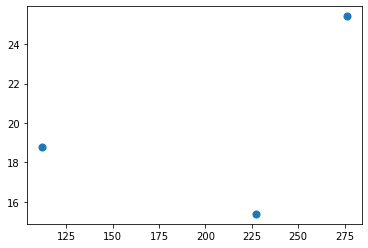

In [219]:
plt.scatter(result['len_track'], result['elongation_time'], s=50)